**Aluno:** Felipe Bizzo --------------------

## Enunciado exercício 9.8
Uma central de potência a vapor, como a mostrada na Fig. 9.3, opera num ciclo de Rankine. A pressão e a temperatura na seção de saída da caldeira são respectivamente iguais a 3,5 MPa e 400ºC e a turbina descarrega vapor, no condensador, a pressão de 10 kPa. Determine o trabalho específico e a transferência de calor em cada componente deste ciclo ideal e a eficiência do ciclo.

O problema foi resolvido utilizando a biblioteca PYroMat, desenvolvido em Python. Para começar, são importados os dados de tabela e configurado suas unidades:

In [ ]:
!pip install pyromat
import pyromat as pm

pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100

mp_water = pm.get("mp.H2O")

     |████████████████████████████████| 630 kB 5.1 MB/s 
  Created wheel for pyromat: filename=PYroMat-2.1.10-py3-none-any.whl size=1277397 sha256=e91c3aab6b3e19af84223cbe2ee06c938d2220712aad1a29d7f4b98b3ce260ca
  Stored in directory: /root/.cache/pip/wheels/90/8c/97/4a3e8a71ec5c154f013db233c1d2fc8ed08bc9721fbc9a51a4
Successfully built pyromat


## Resolução
Para resolver este problema, consideramos uma superfície de controle ao redor da bomba,
a caldeira, a turbina e o condensador.

Primeiro, considere a bomba:
líquido saturado, portanto, x = 0

In [ ]:
p1 = 10                             # Pressão no condensador em kPa
T1 = mp_water.Ts(p=p1)[0]
print(f"T1 = {round(float(T1),1)} ºC")

s1 = mp_water.ss(p=p1)[0]
p2 = 3500                           # Pressão na caldeira em kPa
s2= s1
v = 1/mp_water.ds(p=p1)[0]

w_p = v*(p2-p1)
print(f"Trabalho requerido na bomba: {round(float(w_p),1)} kJ/kg")

h1 = mp_water.hs(p=p1)[0]

print(f"h1 = {round(float(h1),1)} kJ/kg")

h2 = h1+w_p
T2 = 400                            # Temperatura de saída da caldeira

print(f"h2 = {round(float(h2),1)} kJ/kg")

T1 = 319.0 ºC
Trabalho requerido na bomba: 3.5 kJ/kg
h1 = 191.8 kJ/kg
h2 = 195.3 kJ/kg


Vamos considerar a caldeira:
o vapor sai da caldeira como vapor saturado, portanto x = **1**

In [ ]:
p3 = p2
s3 = mp_water.ss(p=p3)[1]
T3, x3 = mp_water.T_s(s=s3,p=p3, quality=True)

print(f"T3 = {round(float(T3),1)} ºC")
print(f"Qualidade do vapor x3: {round(float(x3),4)}")
h3 = mp_water.hs(p=p3)[1]

print(f"h3 = {round(float(h3),1)} kJ/kg")

s3dash = mp_water.ss(p=p3)[0]
T3dash = T3

print(f"s3 = {round(float(s3),1)} kJ/kg K")

q_H = h3-h2

print(f"Calor gerado na caldeira: {round(float(q_H),1)} kJ/kg")

T3 = 515.7 ºC
Qualidade do vapor x3: 1.0
h3 = 2802.7 kJ/kg
s3 = 6.1 kJ/kg K
Calor gerado na caldeira: 2607.4 kJ/kg


Agora, consideramos a turbina:

In [ ]:
p4 = p1
s4 = s3
T4, x4 = mp_water.T_s(s=s4,p=p4, quality=True)

print(f"T4 = {round(float(T4),1)} ºC")
print(f"Qualidade do vapor de baixa pressão x4: {round(float(x4),4)}")
h4 = mp_water.h(p=p4,x=x4)

print(f"h4 = {round(float(h4),1)} kJ/kg")
print(f"s4 = {round(float(s4),1)} kJ/kg K")

w_t = h3-h4

print(f"Trabalho gerado pela turbina: {round(float(w_t),1)} kJ/kg")

T4 = 319.0 ºC
Qualidade do vapor de baixa pressão x4: 0.7301
h4 = 1938.2 kJ/kg
s4 = 6.1 kJ/kg K
Trabalho gerado pela turbina: 864.5 kJ/kg


Finalmente, consideramos o condensador:


In [ ]:
q_L = h4-h1
print(f"Calor rejeitado pelo condensador: {round(float(q_L),1)} kJ/kg")

Calor rejeitado pelo condensador: 1746.4 kJ/kg


Agora podemos calcular a eficiência térmica com $$\eta_{th}=\frac{w_{net}}{q_H}$$

In [ ]:
eta_th = (w_t-w_p)/q_H*100
print(f"A eficiência térmica é: {round(float(eta_th),1)}%")

A eficiência térmica é: 33.0%


Também podemos mostrar o ciclo de Rankine visualmente
criando um gráfico

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text([6.22442886], [318.9556078], 'Condensador (4)\nT = 318.96 K\nh = 1938.2 kJ/kg \ns = 6.124 kJ/kgK\nx = 0.73')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


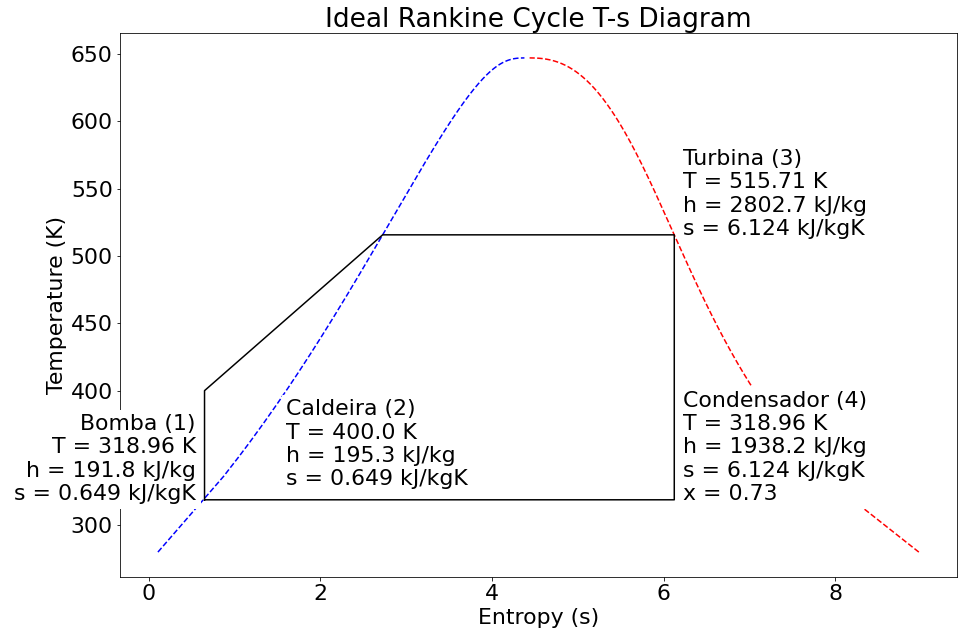

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1,22063,1000)
T = mp_water.Ts(p=p)
s = mp_water.ss(p=p)

font = {'family' : 'Times New Roman',
        'size'   : 22}

plt.figure(figsize=(15,10))
plt.title('Ideal Rankine Cycle T-s Diagram')
plt.rc('font', **font)
plt.plot(s[0],T, 'b--')
plt.plot(s[1],T,'r--')
plt.ylabel('Temperature (K)')
plt.xlabel('Entropy (s)')
plt.plot([s1, s2, s3dash, s3, s4, s1],[T1, T2, T3dash, T3, T4, T1], 'black')

plt.text(s1-.1,T1,f'Bomba (1)\nT = {round(float(T1),2)} K\nh = {round(float(h1),1)} kJ/kg\n s = {round(float(s1),3)} kJ/kgK',
    ha='right',backgroundcolor='white')
plt.text(1.6,330,f'Caldeira (2)\nT = {round(float(T2),2)} K\nh = {round(float(h2),1)} kJ/kg \ns = {round(float(s2),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T3,f'Turbina (3)\nT = {round(float(T3),2)} K\nh = {round(float(h3),1)} kJ/kg \ns = {round(float(s3),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s4+.1,T4,f'Condensador (4)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \ns = {round(float(s4),3)} kJ/kgK\nx = {round(float(x4),3)}',
    ha='left',backgroundcolor='white')